<a href="https://colab.research.google.com/github/FitriRamadhania/TugasMachineLearning/blob/main/index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

In [1]:
# yang di import
import pandas as pd
import numpy as np
import sklearn.model_selection as ms
import sklearn.linear_model as lm
import sklearn.metrics as met
import matplotlib.pyplot as plt
import sklearn.feature_selection as fs

In [3]:
df1 = pd.read_csv('drive/MyDrive/fitri_TM9/dataset/calonpembeli.csv')
df1.describe()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000
mean,500.500000,43.532000,1.469000,0.481000,0.95200,270.09000,0.633000
std,288.819436,12.672078,1.073402,0.499889,0.80146,95.23681,0.482228
min,1.000000,24.000000,0.000000,0.000000,0.00000,95.00000,0.000000
25%,250.750000,33.000000,1.000000,0.000000,0.00000,187.00000,0.000000
50%,500.500000,43.000000,1.000000,0.000000,1.00000,258.50000,1.000000
75%,750.250000,53.000000,2.000000,1.000000,2.00000,352.25000,1.000000
max,1000.000000,164.000000,3.000000,1.000000,4.00000,490.00000,1.000000


di atas Usia maling tinggi adalah 164 tahun maka kita saring. hanya sampai 100 saja

In [4]:
df1 = df1[df1["Usia"] <= 100]

kita perlu melihat apakah ada data kosong (null) di dalamnya.

In [5]:
df1.isnull().sum()

ID                0
Usia              0
Status            0
Kelamin           0
Memiliki_Mobil    0
Penghasilan       0
Beli_Mobil        0
dtype: int64

Jika ada data yang NaN/Null maka kita Hilangkan dgn df1.dropna()
jika tidak ada maka langsung saja.

ingin melihat total pembeli sama yg tidak beli

In [6]:
df1["Beli_Mobil"].value_counts()

Beli_Mobil
1    633
0    365
Name: count, dtype: int64

0 adalah tidak jadi beli dan 1 adalah benar benar pembeli mobil.

Kita buat data Training dan data test. data training 80% dan data test 20% ini harus dipilh secara acak.

In [7]:
X = df1[['Usia','Status','Kelamin','Memiliki_Mobil', 'Penghasilan']]
y = df1.Beli_Mobil
X_train,X_test,y_train,y_test = ms.train_test_split(X,y, test_size = 0.2, random_state=0)

## Model

In [8]:
model = lm.LogisticRegression(solver='lbfgs')
model.fit(X_train,y_train)

LogisticRegression()

cari tau nilai slope/koefisien (m) dan intercept (b).

In [9]:
print(model.coef_)

[[-0.01594363 -0.17093162 -1.03941673  0.07720411  0.05686702]]


In [10]:
y_prediksi = model.predict(X_test)
print(y_prediksi)

[1 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1
 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0
 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 1 1
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1
 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1]


In [11]:
X_test.head()

,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan
272,54,3,0,0,416
727,45,2,1,1,131
31,37,2,1,1,203
344,58,0,0,1,265
606,53,1,0,1,348


In [12]:
X_test.head(1)

,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan
272,54,3,0,0,416


In [13]:
confusionmatrix = met.confusion_matrix(y_test, y_prediksi)
confusionmatrix

array([[ 59,   4],
       [  5, 132]])

angka di atas,kita bisa gunakan utk mengukur accuracy(akurasi) model.

In [14]:
score = model.score(X_test, y_test)
print(score)

0.955


akurasi model kita berniali 95,5% yg berarti sudah sangat baik, Secara umum di bidang Data Science, model dgn akurasi di atas 70% sudah bisa digolongkan sebagai model yg berkinerja cukup baik.

Untuk mengukur kinerja model semacam ini, melihat angka akurasi saja tidaklah cukup.

In [15]:
precision = met.precision_score(y_test, y_prediksi)
print(precision)

0.9705882352941176


nilai di atas adalah precision memberikan petunjuk seberapa baik model dpt "menangkap prediksi yg positif"

AUC(Area Under Curve), atau luas bidang di bawah kurva, dipakai sebagai ukuran baik-buruknya suatu model.

In [16]:
auc1 = met.roc_auc_score(y_test, y_prediksi)
print(auc1)

0.9500057930714866


AUC model kita 0,950 yang artinya sangat tinggi. Ini secara sekilas bisa berarti bagus, namun bila angka AUC terlalu mendekati angka 1, bisa jadi ini pertanda bahwa model kita menjadi overfit, yaitu hanya bagus ketika diukur dengan training dataset. Resiko ini harus dilihat lebih lanjut. Kita akan bahas metode meningkatkan akurasi model di bagian berikutnya.

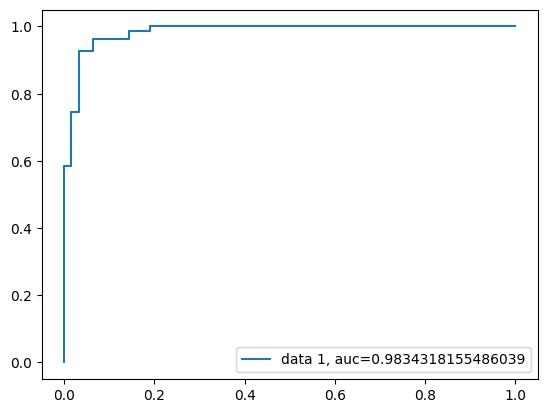

In [17]:
y_pred_proba = model.predict_proba(X_test) [::,1]
fb, tp, _ = met.roc_curve(y_test, y_pred_proba)
auc2 = met.roc_auc_score(y_test, y_pred_proba)
plt.plot(fb,tp,label="data 1, auc="+str(auc2))
plt.legend(loc=4)
plt.show()

Fungsi roc_curve() utk membantu kita mengeluarkan kurva ROC.

In [18]:
rfe = fs.RFE(model, step=3)
rfe =  rfe.fit(X_train, y_train)
print('Support = ', rfe.support_)
print('Ranking = ', rfe.ranking_)

Support =  [False  True  True False False]
Ranking =  [2 1 1 2 2]


Metode di atas adalah Recursive Feature Elimination(RFE) dpt dipakai utk memilih featurenyg baik utk pembuatan model. cara kerjanya adalah dgn menghilang feature satu per-satu dan secara rekursif(berulang-ulang) membagun model, lalu mengevaluasi keluaran model berdasarkan feature yg terbiasa.

Pada praktiknya, proses feature selection adalah salah satu aktivitas yang paling penting dilakukan dalam membangun model, dan seringkali harus dilakukan secara berulang-ulang karena di dunia industri, jumlah feature bisa puluhan hingga ratusan.

Feature juga bisa ditambah jumlahnya dengan cara menggunakan data turunan, data gabungan atau data hasil kalkulasi. Proses ini membuat feature-feature baru disebut feature creation, yaitu turunan dari data-data yang sudah ada.

Logistic Regression adalah metode yang banyak digunakan karena relatif mudah dipahami dan mudah diterapkan untuk keperluan binary classification.

Logistic Regression tidak mampu menangani dataset dengan banyak feature. Logistic regression juga lebih rentan terhadap overfitting.